In [1]:
from google.colab import files
uploaded = files.upload()


ModuleNotFoundError: No module named 'google.colab'

In [2]:
!pip install pandas matplotlib seaborn scikit-learn


In [12]:
import pandas as pd
from google.colab import files # Make sure this is imported if not already

# This cell handles file upload - assuming you have already run this
# uploaded = files.upload()

# Get the filename from the uploaded dictionary
# Note: If you uploaded multiple files, you'll need to choose the correct key
file_name = list(uploaded.keys())[0] # Assuming only one file was uploaded

# Read the CSV using the uploaded file name
df=pd.read_csv(file_name)

In [13]:
print(df.isnull().sum())
df = df.dropna()  # Or use fillna() if appropriate


MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar


In [20]:
df.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [21]:
df = df[['Rainfall']].dropna()


In [23]:
import numpy as np

# Step 3: Simulate month labels
n = len(df)
rows_per_month = n // 12
total_rows = rows_per_month * 12  # Trim to the nearest multiple of 12

df = df.iloc[:total_rows].copy()  # Trim the dataset
df['Month'] = np.repeat(range(1, 13), rows_per_month)


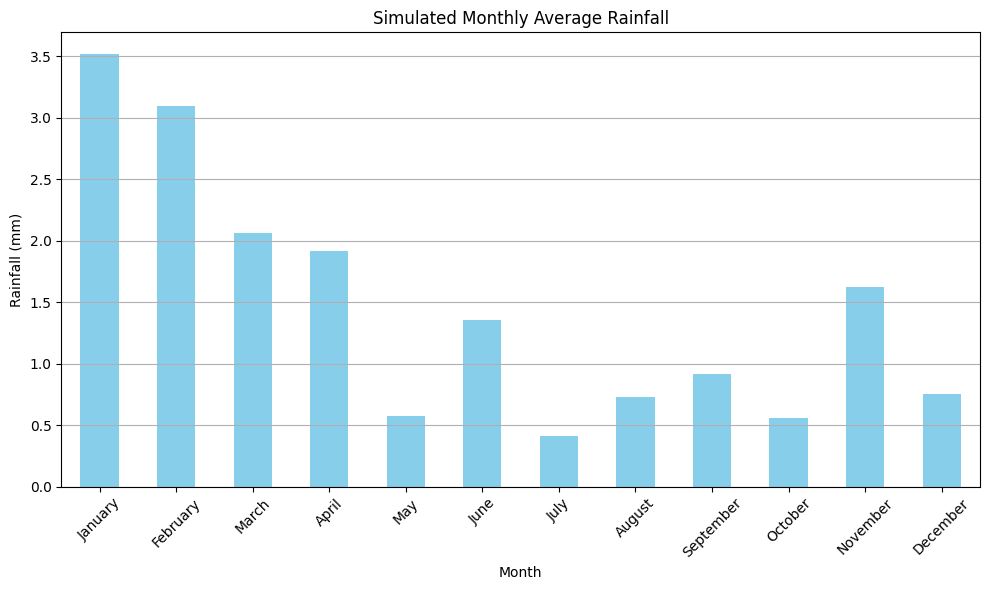

In [24]:
# Calculate average rainfall per month
monthly_avg_rainfall = df.groupby('Month')['Rainfall'].mean()

# Convert to month names for readability
import calendar
monthly_avg_rainfall.index = [calendar.month_name[m] for m in monthly_avg_rainfall.index]

# Plot
monthly_avg_rainfall.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Simulated Monthly Average Rainfall')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
